In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# read dataframe
df=pd.read_csv('tran_sf_roadve+ESTAT.csv')
# remove d's from dataframe
data=df.replace(' d','',regex=True)
# in the source document NaN values were lable ' :', thus we changed it into NaN
data=data.replace(': ',np.NaN)
# change data type to float
data=data[data.columns[1:]].astype('float64')


In [3]:
#Since in the given data frame , and ; are delimeters we made new data frame and split one collumn into 4 new ones 
new = df['freq;unit;vehicle;geo\\TIME_PERIOD'].str.split(";", n = 3, expand = True)
#The names for new columns are extracted 
new_col=df.columns[0].split(';')
#New columns are rename and for the last column we use only 'geo'
new.rename(columns={0:new_col[0] , 1:new_col[1], 2:new_col[2],3:'geo'},inplace=True)
data=pd.concat([new,data],axis=1)


In [4]:
#remove from column names spaces 
str_list=data.columns
for i,item in enumerate(str_list):
    data.rename(columns={str_list[i]:item.replace(' ','')},inplace=True)

#drop rows, which do not correspond to individual contries
data.drop(data[data['geo'] =='EU27_2020'].index, inplace = True)
data.drop(data[data['geo'] =='EU28'].index, inplace = True)
#check the lsit of the countries

data.head()

,freq,unit,vehicle,geo,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A,NR,ANI_RD,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0
1,A,NR,ANI_RD,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,7.0,12.0,5.0,3.0,5.0,6.0,5.0,6.0
2,A,NR,ANI_RD,DK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,A,NR,ANI_RD,EE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,A,NR,ANI_RD,HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


<font size="5">Does data collection improved over years?</font>

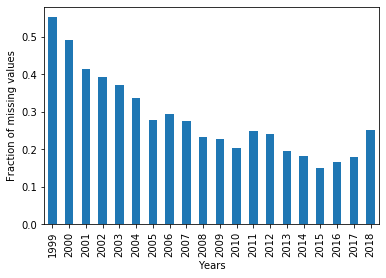

In [5]:
#Check the missing values
(data[data.columns[4:]].isnull().sum()/len(data)).plot.bar()
plt.ylabel('Fraction of missing values')
plt.xlabel('Years')
plt.show()

It seems that data collection **improved** over time. Now let's take a look at the historical data of total deaths by car accidents in EU

<font size="5">How do road kills change over the course of 1999-2018?</font>

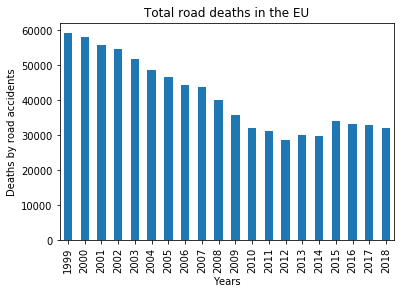

In [6]:
#Plot the annual cummulative deaths by road accident in EU
data.groupby('vehicle').sum().loc['TOTAL'].plot.bar()
plt.ylabel('Deaths by road accidents')
plt.xlabel('Years')
plt.title('Total road deaths in the EU')
plt.show()

Deaths by road accidents have **contracted over the course of 1999-2018**. Now let's check which types of mean of the transport are mainly involved in the deadly accidents. 

<font size="5">Which categories of transport are most commonly involved in the deadly accidents?</font>

In [7]:
#Let's sort the data by type of the vehicle, drop total, unknown and other collums 
v_type=data.groupby('vehicle').sum().drop(index=['TOTAL','UNK','OTH'])
#Convert the list into relative numbers (percentages) and show the list in the descending order
v_list=(v_type.sum(axis=1)/sum(v_type.sum(axis=1))*100).sort_values(ascending=False)
v_list
 



vehicle
CAR           62.472907
MOTO_NSP      12.357828
BIKE           8.505350
MOP            4.718409
VG_LE3P5       3.174390
MOTO_GT125     2.168094
MOTO_2WH       1.314033
VG_GT3P5       1.209447
VEH_GD         0.958131
TRC_AGR        0.734854
TRC            0.598273
BUS            0.547356
MTZ_OTH        0.432621
MOTO_LE125     0.394434
NMTZ_OTH       0.297244
BUS_TOT        0.040080
ANI_RD         0.023222
MCO            0.018922
QUA_GT50       0.015653
BUS_MIN        0.010321
QUA_LE50       0.003612
TRM_LR         0.003096
BUS_TRO        0.001720
dtype: float64

Meaning of abbreviations:
MOTO_NSP motorbikes not specified , Bikes, Mopeds, VG_LE3P5 <3.5 tonnes goods cars, MOTO_GT125 Motorcycles > 125cm3
MOTO_2WH Two-wheeled road motor vehicles (motorcycles), VG_GT3P5 Goods vehicles > 3.5 tonnes


In [8]:
#We take only those cateogories that account for more than 1 percent of total deaths. The sum of it correspond to 95.9% of total deaths
v_list[v_list>1.0].sum()

95.92045962775657

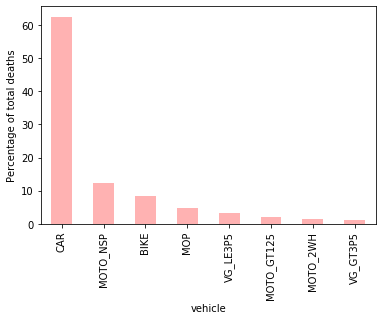

In [9]:
v_list[v_list>1.0].plot.bar(color=(1.0, 0.0, 0.0, 0.3))
plt.ylabel('Percentage of total deaths')
plt.show()

**Car's are by far the most dominant in the deadly car accidents.** Let's classify the current list into bigger categories. Namely, passenger cars, motorbikes/mopeds and goods vehicles.

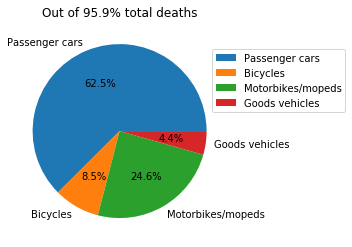

In [10]:
def new_list(v_list):
    empty_dict={'Passenger cars':0,'Bicycles':0,'Motorbikes/mopeds':0,'Goods vehicles':0}
    for item in v_list.keys():
        if item == 'CAR':
            empty_dict['Passenger cars']=v_list[item]
        elif item == 'BIKE':
            empty_dict['Bicycles']=v_list[item]
        elif item in ['VG_LE3P5','VG_GT3P5']:
            empty_dict['Goods vehicles']+=v_list[item]
        else:
            empty_dict['Motorbikes/mopeds']+=v_list[item]
    return empty_dict

plt.pie(pd.Series(new_list(v_list)),labels=new_list(v_list).keys(),autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(0.9, 0.9))
plt.title('Out of 95.9% total deaths')
plt.show()

**Slightly more than one fifth out of 95.9 % total road kils involve motorbikes.Roughly one tenth out of 95.9 % of total deaths involve cyclists!**

<font size="5">Which of these transport categories have experienced the biggest reduction in deaths?</font>

In [11]:
#How much are deaths reduced for each category?
def reduction (data,start,finish):
    #create an dictionary with 4 keys
    empty_dict={'Passenger cars':0,'Bicycles':0,'Motorbikes/mopeds':0,'Goods vehicles':0}
    #initialize 4 denominators 
    dn1,dn2,dn3,dn4=0,0,0,0
    for item in data.index:
        if item == 'CAR':
            empty_dict['Passenger cars']=data[start][item]-data[finish][item]
            dn1+=data[start][item]
        elif item == 'BIKE':
            empty_dict['Bicycles']=data[start][item]-data[finish][item]
            dn2+=data[start][item]
        elif item in ['VG_LE3P5','VG_GT3P5']:
            empty_dict['Goods vehicles']+=data[start][item]-data[finish][item]
            dn3+=data[start][item]
        else:
            empty_dict['Motorbikes/mopeds']+=data[start][item]-data[finish][item]
            dn4+=data[start][item]
    #calculate the relative reduction by dividing absolute decrease by deaths of particular category in 1999       
    empty_dict['Passenger cars']=empty_dict['Passenger cars']/dn1 
    empty_dict['Bicycles']=empty_dict['Bicycles']/dn2
    empty_dict['Goods vehicles']=empty_dict['Goods vehicles']/dn3
    empty_dict['Motorbikes/mopeds']=empty_dict['Motorbikes/mopeds']/dn4
    return empty_dict
reduction(v_type,'1999','2018')

{'Passenger cars': 0.5434897713598075,
 'Bicycles': 0.08638743455497382,
 'Motorbikes/mopeds': 0.30207117852975496,
 'Goods vehicles': 0.4464516129032258}

**It seems that the biggest improvement was done in the category of the passenger cars (~65% reduction in deaths). The least improved category are bikes with only 8.6 % reduction in deaths.**

<font size="5">Which top 10 countries have improved the most in reducing the road kills?<font>

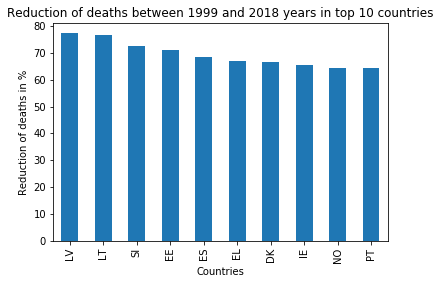

In [12]:
#Biggest reductions by country
def top_10_improved (df):
    #take data and groupby by country
    data=df[df.vehicle=='TOTAL'].groupby('geo').sum() 
    #calculate the change of deaths from 1999 to 2018 in percentage
    imp_deaths=((1-data['2018']/data['1999'])*100).sort_values(ascending=False)
    return imp_deaths[:10]
    

top_10_improved(data).plot.bar()
plt.title('Reduction of deaths between 1999 and 2018 years in top 10 countries')
plt.ylabel('Reduction of deaths in %')
plt.xlabel('Countries')
plt.show()

**Latvia, Lithuania,Slovenia and Estonia reduced road kills by more than 70%. Seems that the Baltic states have improved the most.**

<font size="5">Was reduction in deaths gradual process or there was a particular year when number of road kills dropped?<font>

In [13]:
#Is reduction in deaths gradual or there was particular year when it happened.
def reduction_pat (df):
    #take data from the main dataframe
    data=df[df.vehicle=='TOTAL'].groupby('geo').sum()
    #define the country list 
    country_list=top_10_improved(df).keys()
    #create empty dictioniaries for years of maximum reduction and std to check the reduction
    dict_1={}
    
    for item in country_list:
        #Return the year when relative decrease in deaths was the highest
        value_1=(data.loc[item]/data.loc[item].shift(1)-1).idxmin()
        #Return standard deviation of relative decrease in deaths for each country
        value_2=(data.loc[item]/data.loc[item].shift(1)-1).std()
        dict_1[item]=value_1,value_2
       #convert dict to dataframe
        new_data=pd.DataFrame.from_dict(dict_1, orient='index', columns=['Year of max rel. red', 'Std of rel. red.',])
    return new_data

   
reduction_pat(data)

,Year of max rel. red,Std of rel. red.
LV,2008,0.106843
LT,2008,0.117341
SI,2008,0.117427
EE,2008,0.197695
ES,2008,0.068501
EL,2010,0.056546
DK,2009,0.146516
IE,2008,0.103972
NO,2017,0.150926
PT,2006,0.100042


**In 2008 most of top 10 countries experienced the biggest relative reduction in road kills.** Other than that, the second collumn named 'Std of rel. red.' standart devation of 
the relative reductions in deaths in the period of 1999-2018. **Spain has the smallest standard variation meaning that annual reduction is not well dispersed**. **In contrast Estonia exhibits the highest 0.197 standard deviation. Implying, that in some years reudctions was far from the average annual drop.**